###Μηχανική Μάθηση
####2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2024-25




# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

Ονοματεπώνυμο φοιτητή: **Οικονόμου Γεώργιος** (Oikonomou George)

Α.Μ.: **03121103**

### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

**Βιβλιοθήκες:** Αρχικά, φορτώνουμε όλες τις απαραίτητες βιβλιοθήκες για το σύνολο των ερωτημάτων. Έπειτα, αντιγράφω τα δοσμένα αρχεία στο My Drive και τα φορτώνω καταλλήλως με χρήση της συνάρτησης **np.load**.


In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import adjusted_rand_score, silhouette_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
# Question 1.a. Load the uploaded file (hyperspectral image)

path = '/content/drive/My Drive/ML/salinas_image.npy'
image = np.load(path)

path = '/content/drive/My Drive/ML/salinas_labels.npy'
image_labels = np.load(path)

Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

---
**Ερώτημα 2α.** Χρησιμοποιώ την μέθοδο **.shape** της pandas για να βρω το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών.

Προκύπτει 512 pixels ύψος, 217 pixels πλάτος και 204 υπερφασματικά κανάλια.

---

In [ ]:
# Question 2a.

height, width, bands = image.shape
print(image.shape)

print("The height of the image is:", height)
print("The width of the image is:", width)
print("The number of bands in the image is:", bands)

(512, 217, 204)
The height of the image is: 512
The width of the image is: 217
The number of bands in the image is: 204


---
**Ερώτημα 2β.** Σχεδιάζω τα ζητούμενα κανάλια με το inferno colormap της βιβλιοθήκης **matplotlib.pyplot()**. Τα μοτίβα είναι πιο ξεκάθαρα στα κανάλια με μεγαλύτερες τιμές.

---

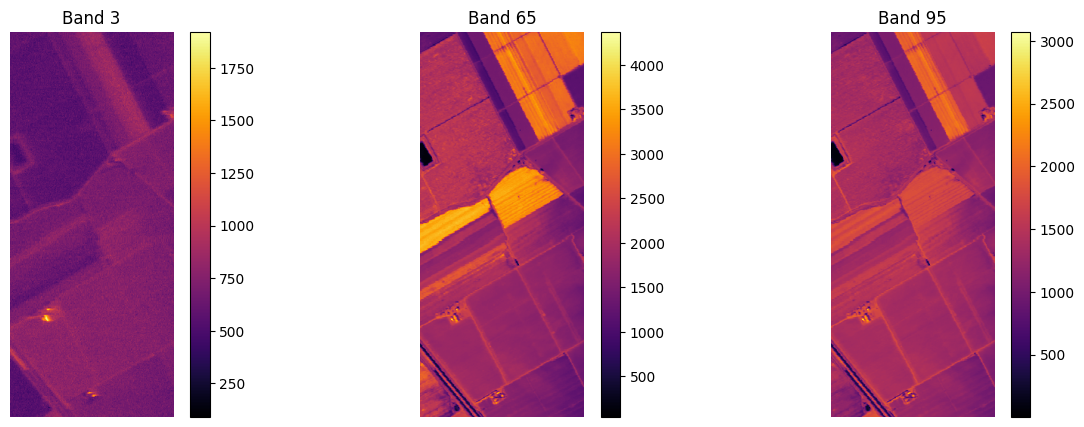

In [ ]:
# Question 2b.

band_3 = image[:, :, 2]
band_65 = image[:, :, 64]
band_95 = image[:, :, 94]

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.imshow(band_3, cmap = 'inferno')
plt.title('Band 3')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(band_65, cmap = 'inferno')
plt.title('Band 65')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(band_95, cmap = 'inferno')
plt.title('Band 95')
plt.axis('off')
plt.colorbar()

plt.show()

---
**Ερώτημα 2γ.** Υπολογίζω τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις, δηλαδή, υπολογίζω τον αριθμό των διαφορετικών κλάσεων στον πίνακα image_labels με την μέθοδο **.unique** της pandas. Επιτυχώς έχω τις 16 διαφορετικές κατηγορίες και αυτή του background, άρα, σύνολο 17.

---

In [ ]:
# Question 2c.

unique_classes = np.unique(image_labels)
print("Unique classes:", unique_classes)
num_classes = len(unique_classes)
print("Number of unique classes:", num_classes)

Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of unique classes: 17


---
**Ερώτημα 2δ.**

---

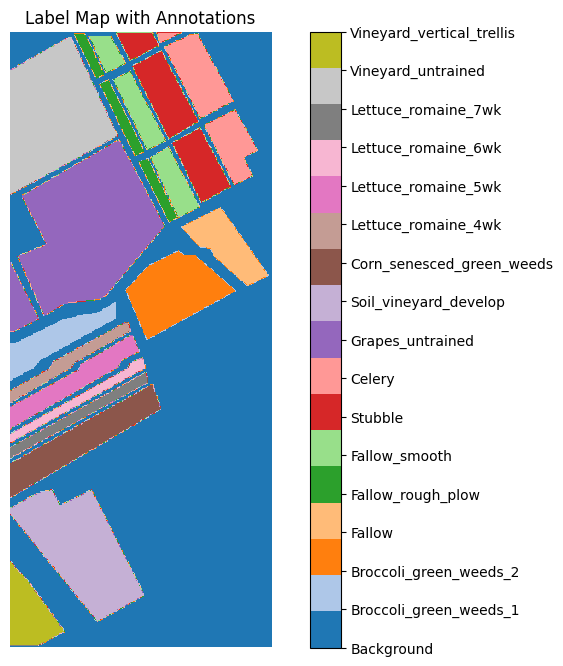

In [ ]:
# Question 2d.

classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

colors = plt.cm.tab20(np.linspace(0, 1, 20))[:num_classes]
fixed_cmap = ListedColormap(colors)

plt.figure(figsize = (10, 8))
map = plt.imshow(image_labels, cmap = fixed_cmap)

map_bar = plt.colorbar(map, ticks = np.arange(num_classes))
map_bar.set_ticklabels(classes)

plt.title("Label Map with Annotations")
plt.axis('off')
plt.show()

---
**Ερώτημα 2ε.** Υπολογίζω τον αριθμό των pixel της εικόνας για κάθε επισημείωση με την μέθοδο **.bincount** της numpy, η οποία μετράει πόσες φορές εμφανίζεται κάθε μοναδική τιμή στο πίνακα.

Επιβεβαιώνω ότι το άθροισμα των pixels όλων των κατηγοριών είναι σωστό εφόσον αυτό ισούται με το γινόμενο του ύψους και του πλάτους της εικόνας (δηλαδή, height * width = 111104).

---

In [ ]:
# Question 2e.

# flatten so image_labels is 1D
pixel_counts = np.bincount(image_labels.flatten())

pixel_sum = 0

for i, count in enumerate(pixel_counts):
    pixel_sum += count;
    print(f"Class {classes[i]}: {count} pixels")

print("Total number of pixels:",pixel_sum)

Class Background: 56975 pixels
Class Broccoli_green_weeds_1: 2009 pixels
Class Broccoli_green_weeds_2: 3726 pixels
Class Fallow: 1976 pixels
Class Fallow_rough_plow: 1394 pixels
Class Fallow_smooth: 2678 pixels
Class Stubble: 3959 pixels
Class Celery: 3579 pixels
Class Grapes_untrained: 11271 pixels
Class Soil_vineyard_develop: 6203 pixels
Class Corn_senesced_green_weeds: 3278 pixels
Class Lettuce_romaine_4wk: 1068 pixels
Class Lettuce_romaine_5wk: 1927 pixels
Class Lettuce_romaine_6wk: 916 pixels
Class Lettuce_romaine_7wk: 1070 pixels
Class Vineyard_untrained: 7268 pixels
Class Vineyard_vertical_trellis: 1807 pixels
Total number of pixels: 111104


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

---
**Ερώτημα 3α.**

---

In [ ]:
# Question 3a.

N = height * width
K = bands

image_reshaped = image.reshape(N, K)
image_labels_reshaped = image_labels.flatten()

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

---
**Ερώτημα 3β.**

---

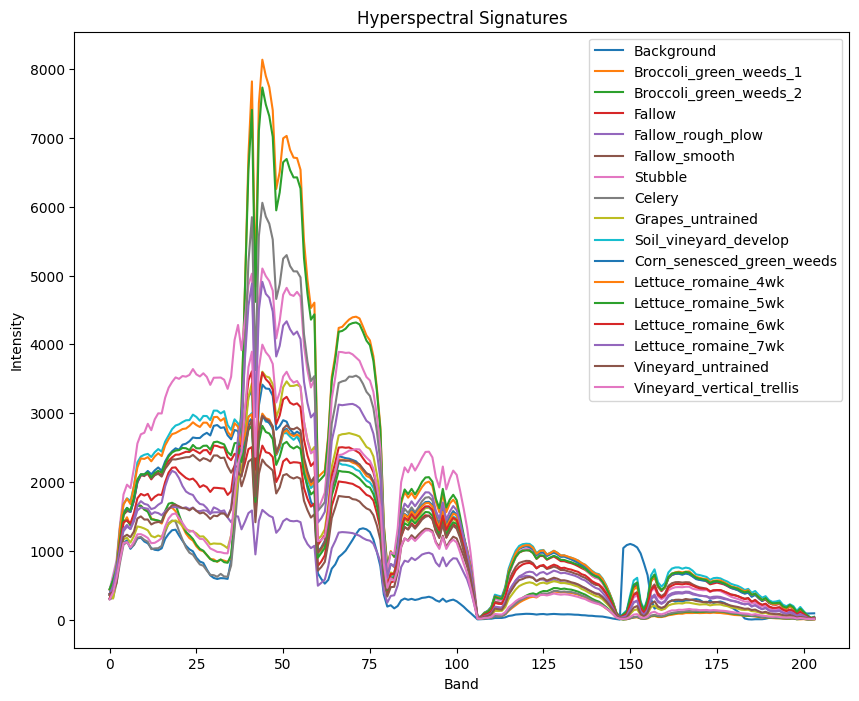

In [ ]:
# Question 3b.

signatures = []

for class_index in range(num_classes):
    class_pixels = np.where(image_labels_reshaped == class_index)[0] # [0] so to keep the indices of the rows, not columns
    random_pixel_index = np.random.choice(class_pixels)

    # Extrach the endmember of each pixel
    random_pixel = image_reshaped[random_pixel_index, :]

    random_pixel = random_pixel.reshape(1, K)
    signatures.append(random_pixel)

plt.figure(figsize = (10, 8))

for i, signature in enumerate(signatures):
    plt.plot(signature.flatten(), label = classes[i])

plt.title("Hyperspectral Signatures")
plt.xlabel("Band")
plt.ylabel("Intensity")
plt.legend()
plt.show()

3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

---
**Ερώτημα 3γ.** Υπάρχουν καλλιέργειες όπου οι υπογραφές τους φτάνουν σε υψηλές εντάσεις, όπως, για παράδειγμα, τα Broccoli με ένταση που φτάνει αρκετές χιλιάδες γύρω από το 50ο band.

Έτσι, υπάρχουν καλλιέργειες που είναι εύκολα διαχωρίσιμες, όπως οι "Broccoli_green_weeds_1" λόγω της έντονης υπογραφής τους. Αντίστοιχα, καλλιέργειες που σχετίζονται με ίδια φυτά, φεριπήν τα "Lettuce_romaine_4wk", "Lettuce_romaine_5wk", "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", δεν είναι εύκολα διαχωρίσιμες μεταξύ τους.

Τέλος, δεν προσφέρουν χρήσιμη πληροφορία όλα τα κανάλια για τον διαχωρισμό των καλλιεργειών. Από το 110ο κανάλι και έπειτα, οι υπογραφές των καλλιεργειών φαίνονται παρόμοιες, αν όχι ταυτόσημες στο γυμνό μάτι.

---

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών.

---
**Ερώτημα 3δ.**

Από τον πίνακα συσχέτισης δεδομένων, μπορώ να βρω τα διαφορετικά κανάλια με υψηλή συσχέτιση μεταξύ τους (περισσότερο από 0.8):

*   0 - 35 με 0 - 35
*   0 - 35 με 108 - 217
*   42 - 105 με 42 - 105
*   108 - 217 με 108 - 217

Οπότε, και τα κανάλια αυτά δεν είναι εύκολα διαχωρίσιμα μεταξύ τους.

---

<Axes: >

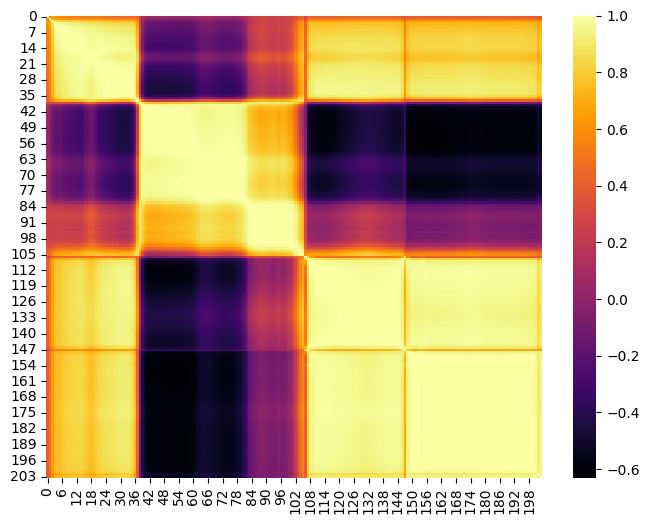

In [ ]:
# Question 3d.
# Heatmap

correlation_matrix = np.corrcoef(image_reshaped.T)
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, cmap = 'inferno', annot = False)

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.

---
**Ερώτημα 4α.** Εφαρμόζω τον αλγόριθμο KMeans και υπολογίζω τα μέτρα **ARI** και **Silhouette** για την απόδοση του από την βιβλιοθήκη **sklearn.metrics**.

Προκύπτει ARI = ~ 0.15 και Silhouette = ~ 0.41, τα οποία είναι και τα δύο χαμηλά, ειδικά το πρώτο που μαρτυρά κακή συσταδοποίηση. Χρειάζεται, λοιπόν, να γίνει κατάλληλη προεπεξεργασία του συνόλου δεδομένων, για παράδειγμα, να αφαιρεθεί η κατηγορία του Background.

---

In [ ]:
# Question 4a.

n_cluster = 17
rand_state = 42

# Initialize K-Means
kmeans = KMeans(n_clusters = n_cluster, random_state = rand_state)
# Fit
kmeans.fit(image_reshaped)
# Predict
kmeans_labels = kmeans.predict(image_reshaped)

# Adjusted Rand Index
ari = adjusted_rand_score(image_labels_reshaped, kmeans_labels)
print("Adjusted Rand Index:", ari)

# Silhouette Score
silhouette = silhouette_score(image_reshaped, kmeans_labels)
print("Silhouette Score:", silhouette)

Adjusted Rand Index: 0.14654750991968155
Silhouette Score: 0.41253853421064896


4.β. Χρησιμοποιώντας τα αποτελέσματα τις συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

---
**Ερώτημα 4β.** Με την χρήση της matplotlib, παρατηρώ πως πράγματι συμβαίνει πολύ κακή συσταδοποίηση. Οι διαφορές είναι μεγάλες και χρειάζεται να γίνει **βελτιστοποίηση του αλγόριθμου** και **προεπεξεργασία του συνόλου δεδομένων**.

---

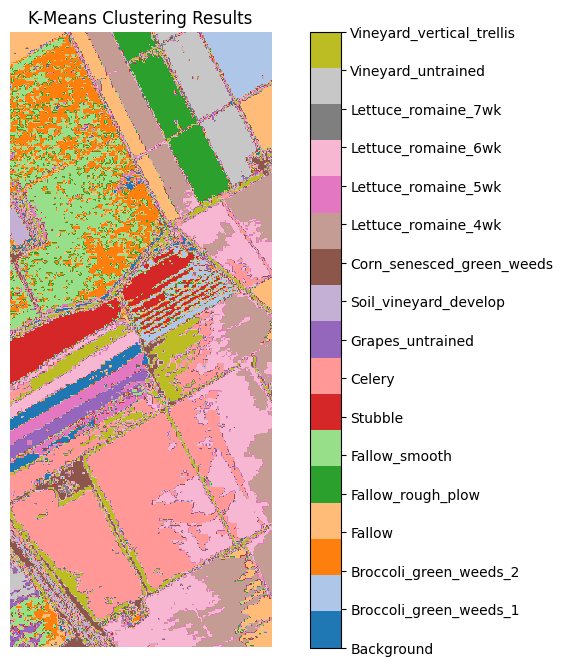

In [ ]:
# Question 4b.

# Display
kmeans_labels_reshaped = kmeans_labels.reshape(height, width)
plt.figure(figsize = (10, 8))
predicted_map = plt.imshow(kmeans_labels_reshaped, cmap = fixed_cmap)

predicted_map_bar = plt.colorbar(predicted_map, ticks = np.arange(n_cluster))
predicted_map_bar.set_ticklabels(classes)
plt.title("K-Means Clustering Results")
plt.axis('off')
plt.show()

4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

---
**Ερώτημα 4γ.** Εφαρμόζω τον αλγόριθμο Fuzzy C-Means και υπολογίζω τα μέτρα **ARI** και **Silhouette** ξανά για την απόδοση του από την βιβλιοθήκη **sklearn.metrics**.

Προκύπτει ARI = ~ 0.13 και Silhouette = ~ 0.35, δηλαδή, έχουμε μειωμένη απόδοση συγκριτικά με τον KMeans.

---

In [ ]:
# Question 4c.
# Step 1
!pip install fuzzy-c-means

In [ ]:
# Question 4c.
# Step 2

from fcmeans import FCM

# Initialize fuzzy-c-means
fcm = FCM(n_clusters = n_cluster)
# Fit
fcm.fit(image_reshaped)
# Predict
fcm_labels = fcm.predict(image_reshaped)

# Adjusted Rand Index
ari = adjusted_rand_score(image_labels_reshaped, fcm_labels)
print("Adjusted Rand Index:", ari)

# Silhouette Score
silhouette = silhouette_score(image_reshaped, fcm_labels)
print("Silhouette Score:", silhouette)

Adjusted Rand Index: 0.13110771778916328
Silhouette Score: 0.3461834927914019


### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

---
**Ερώτημα 5α.**

---

In [ ]:
# Question 5a.
# Data Preprocessing - Dropping the Background

from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components = 3)
# Fit
pca.fit(image_reshaped)
# Transform
pca_image_reshaped = pca.transform(image_reshaped)

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

---
**Ερώτημα 5β.** Εφαρμόζω τη μέθοδο μείωσης διαστατικότητας PCA και προκύπτει πως το 74,5% της διακύμανσης του συνόλου δεδομένων βρίσκεται κατά μήκος του πρώτου άξονα και το 23,5% κατά μήκος του δεύτερου άξονα και το 1,1% κατά μήκος του τρίτου άξονα.

Αυτό σημαίνει ότι με τα πρώτα τρία κύρια συστατικά, χάνεται πληροφορία της τάξης του 0.86% που υπάρχει στα δεδομένα, γεγονός που δείχνει ότι η διάσταση μειώνεται σημαντικά χωρίς μεγάλη απώλεια πληροφοριών.

---

In [ ]:
# Question 5b.
print(pca.explained_variance_ratio_)
print(1 - pca.explained_variance_ratio_.sum())

[0.74473713 0.23531325 0.01134124]
0.008608388875426698


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;

6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

---
**Ερώτημα 6α.**

---

In [ ]:
# Question 6a.

# Initialize K-Means
kmeans = KMeans(n_clusters = n_cluster, random_state = rand_state)
# Fit
kmeans.fit(pca_image_reshaped)
# Predict
pca_kmeans_labels = kmeans.predict(pca_image_reshaped)

# Adjusted Rand Index
ari = adjusted_rand_score(image_labels_reshaped, pca_kmeans_labels)
print("Adjusted Rand Index:", ari)

# Silhouette Score
silhouette = silhouette_score(pca_image_reshaped, pca_kmeans_labels)
print("Silhouette Score:", silhouette)

Adjusted Rand Index: 0.14729232332312386
Silhouette Score: 0.434744159461474


---
**Ερώτημα 6β.** Από τα διαγράμματα μπορώ να έχω τα εξής συμπεράσματα:

*   Η μετρική ARI αυξάνεται σημαντικά από 1 σε 2 συνιστώσες PCA.
*   Μετά τις 2 αυτές συνιστώσες παρατηρείται μείωση, άρα, περισσότερες συνιστώσες PCA δεν βελτιώνουν την ποιότητα του clustering.

*   Το Silhouette Score μειώνεται συστηματικά καθώς αυξάνεται ο αριθμός συνιστωσών PCA, πιθανώς επειδή προστίθεται θόρυβος.

Τελικά, οι 2 πρώτες συνιστώσες PCA φαίνεται να είναι η καλή επιλογή. Οι διαφορές είναι πολύ μικρές σε κάθε περίπτωση

---

In [ ]:
# Question 6b.

aris = []
silhouettes = []

for n_components in range (1, 6):
    pca = PCA(n_components = n_components)
    pca.fit(image_reshaped)
    pca_image_reshaped = pca.transform(image_reshaped)

    # Init
    kmeans = KMeans(n_clusters = n_cluster, random_state = rand_state)
    # Fit
    kmeans.fit(pca_image_reshaped)
    # Predict
    pca_kmeans_labels = kmeans.predict(pca_image_reshaped)

    aris.append(adjusted_rand_score(image_labels_reshaped, pca_kmeans_labels))
    silhouettes.append(silhouette_score(pca_image_reshaped, pca_kmeans_labels))

[0.14513232878432328, 0.15112437989791155, 0.14729232332312386, 0.140564180768985, 0.14079764830171185]
[0.5391023840211777, 0.470826185323263, 0.434744159461474, 0.4105348243276934, 0.40846884570056324]


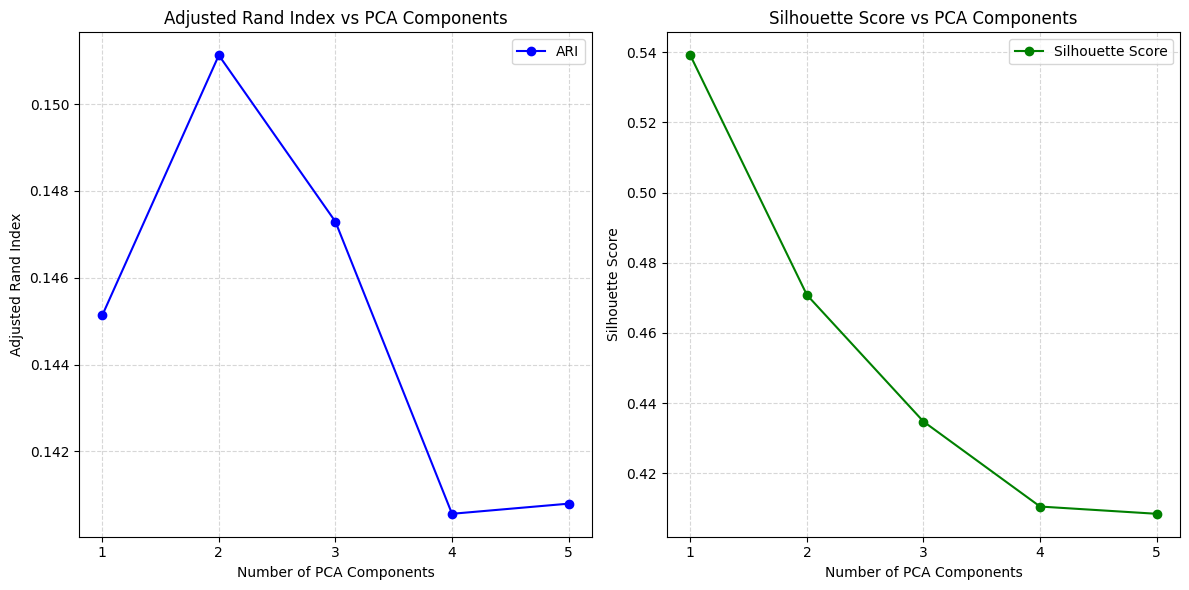

In [ ]:
print(aris)
print(silhouettes)

n_components_range = list(range(1, 6))  # [1, 2, 3, 4, 5]

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aris, marker = 'o', linestyle = '-', color = 'b', label = 'ARI')
plt.title('Adjusted Rand Index vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Adjusted Rand Index')
plt.xticks(n_components_range)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouettes, marker = 'o', linestyle = '-', color = 'g', label = 'Silhouette Score')
plt.title('Silhouette Score vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.xticks(n_components_range)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές). Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.

---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [ ]:
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Streaming output truncated to the last 5000 lines.
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating: 2750/SeaLake/SeaLake_1314.jpg  
  inflatin

In [ ]:
# Display the contents
!ls -lh 2750

total 1.2M
drwxr-xr-x 2 root root 128K Sep 18  2018 AnnualCrop
drwxr-xr-x 2 root root 112K Sep 18  2018 Forest
drwxr-xr-x 2 root root 156K Sep 18  2018 HerbaceousVegetation
drwxr-xr-x 2 root root  88K Sep 18  2018 Highway
drwxr-xr-x 2 root root 108K Sep 18  2018 Industrial
drwxr-xr-x 2 root root  68K Sep 18  2018 Pasture
drwxr-xr-x 2 root root 132K Sep 18  2018 PermanentCrop
drwxr-xr-x 2 root root 132K Sep 18  2018 Residential
drwxr-xr-x 2 root root  76K Sep 18  2018 River
drwxr-xr-x 2 root root 116K Sep 18  2018 SeaLake


---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras. Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.

---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


---
**Ερώτημα 2α.** Φορτώνω καταλλήλως το μοντέλο του MobileNetV3Small από την βιβλιοθήκη **Keras**. Συνεχίζω, τέλος, με τη μέθοδο **Pooling**.

---

In [ ]:
# Question 2a.
# Loading MobileNetV3Small

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small

model = MobileNetV3Small (
    input_shape = (224, 224, 3),  # target_size from the dataset
    weights = 'imagenet',
    include_top = False,
    pooling = 'avg'
    )

model.summary()

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


---
**Ερώτημα 2β.** Εξάγω τα χαρακτηριστικά των εικόνων μέσω της μεθόδου **.predict()**. Οι διαστάσεις που προκύπτουν είναι οι εξής:

*   2700: Ο αριθμός των samples (εικόνες) στο dataset. Δηλαδή, ο εξαγωγέας επεξεργάστηκε 2700 εικόνες. Η εξαγωγή έγινε σωστά αφού εξαρχής φορτώθηκαν 2700 εικόνες.
*   576: Ο αριθμός των χαρακτηριστικών (features) για κάθε εικόνα. Δηλαδή, ο εξαγωγέας συμπίεσε κάθε εικόνα σε διάνυσμα με 576 διαστάσεις. Η εξαγωγή έγινε σωστά αφού το avg_pool έχει Output Shape (None, 576).

---

In [ ]:
# Question 2b.
features = model.predict(dataset, verbose = 1) # verbose = 1 to show progress bar batch-by-batch
print(f'Features shape: {features.shape}')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step
Features shape: (2700, 576)


### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [ ]:
# Question 2c.
# Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Initialize K-Means
kmeans = KMeans(n_clusters = 10, random_state = 42)
# Fit
kmeans.fit(features)
# Predict
kmeans_labels_CNN = kmeans.predict(features)

# Adjusted Rand Index
ari = adjusted_rand_score(dataset.classes, kmeans_labels_CNN)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.5013959271388106


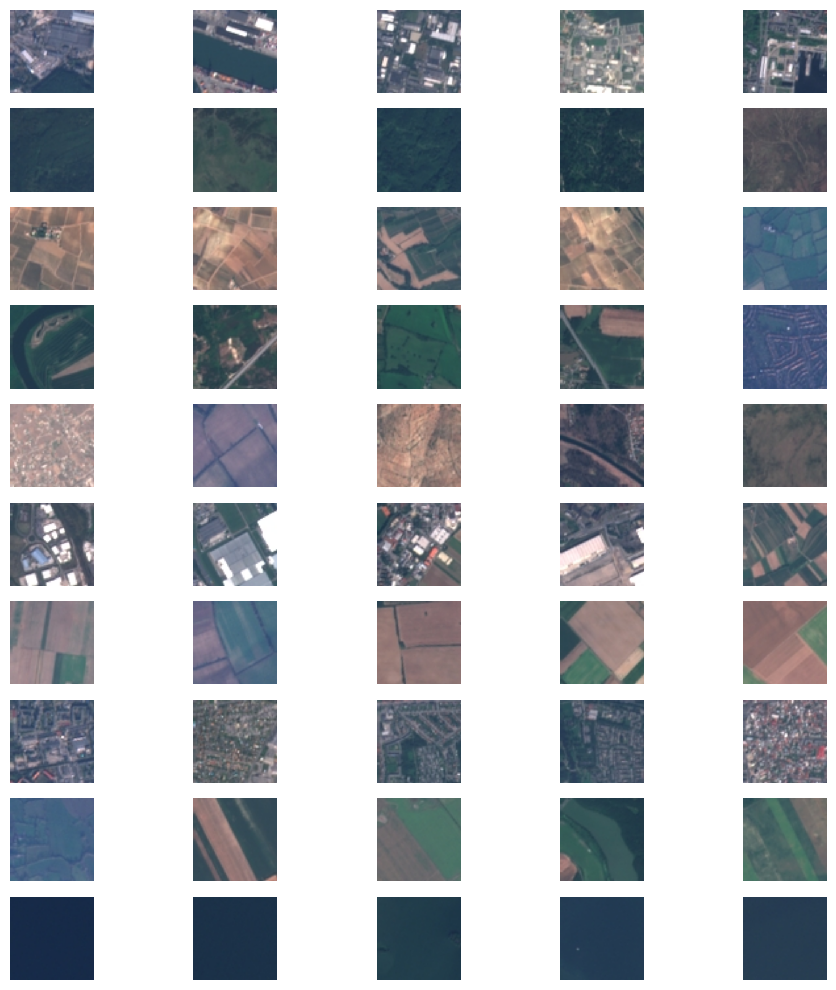

In [ ]:
# Images from Question 2c.

import numpy as np
import matplotlib.pyplot as plt

num_clusters = 10
num_images = 5
dataset_images = dataset  # Your dataset containing images

fig, axes = plt.subplots(num_clusters, num_images, figsize = (10, 10))

for cluster_idx in range(num_clusters):

    cluster_indices = np.where(kmeans_labels_CNN == cluster_idx)[0]

    # Ensure there are enough images in the cluster
    if len(cluster_indices) < num_images:
        continue

    # Randomly select 'num_images' indices from the current cluster
    sampled_indices = np.random.choice(cluster_indices, size = num_images, replace = False)

    # Loop over each of the randomly selected images for the current cluster
    for i, ax in enumerate(axes[cluster_idx]):
      # Get the image index
      selected_image_idx = sampled_indices[i]

      # Fetch the image using the chosen index
      selected_image = dataset_images[selected_image_idx]

      # Extract the image part from the tuple
      if isinstance(selected_image, tuple):
        selected_image = selected_image[0]

      # Remove the batch dimension if it exists
      selected_image = selected_image.squeeze(axis = 0)

      if selected_image.max() > 1:
        # Normalize to [0, 1] if in [0, 255]
        selected_image = selected_image / 255.0

      ax.imshow(selected_image)
      ax.axis('off')

plt.tight_layout()
plt.show()

### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


---
**Ερώτημα 2δ.** Xωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN έχουμε πολύ μειωμένη απόδοση συγκριτικά με πριν, έχοντας τα χαρακτηριστικά από το CNN.

---

In [ ]:
# Question 2d.

# 1.
pixels = []

for batch in dataset:
  new_batch = batch[0].reshape(batch[0].shape[0], -1)
  # new_batch = batch.reshape(batch.shape[0], -1)
  new_batch = new_batch / 255.0 # [0, 1], during image normalization pixel values in standard color images
                                # are typically represented as integers in the range [0, 255]
  pixels.append(new_batch)
  if len(pixels) * dataset.batch_size >= dataset.samples:
    break

# 2.
all_pixels = []                 # N = 2700
all_pixels = np.vstack(pixels)  # M = 224 * 224 * 3 = 150528
print(f'All pixels shape: {all_pixels.shape}')

# 3.
# Initialize K-Means
kmeans = KMeans(n_clusters = 10, random_state = 42)
# Fit
kmeans.fit(all_pixels)
# Predict
kmeans_labels_pixels = kmeans.predict(all_pixels)

# 4.
# Adjusted Rand Index
ari = adjusted_rand_score(dataset.classes, kmeans_labels_pixels)
print("Adjusted Rand Index:", ari)

All pixels shape: (2700, 150528)
Adjusted Rand Index: 0.15124704474444664


### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

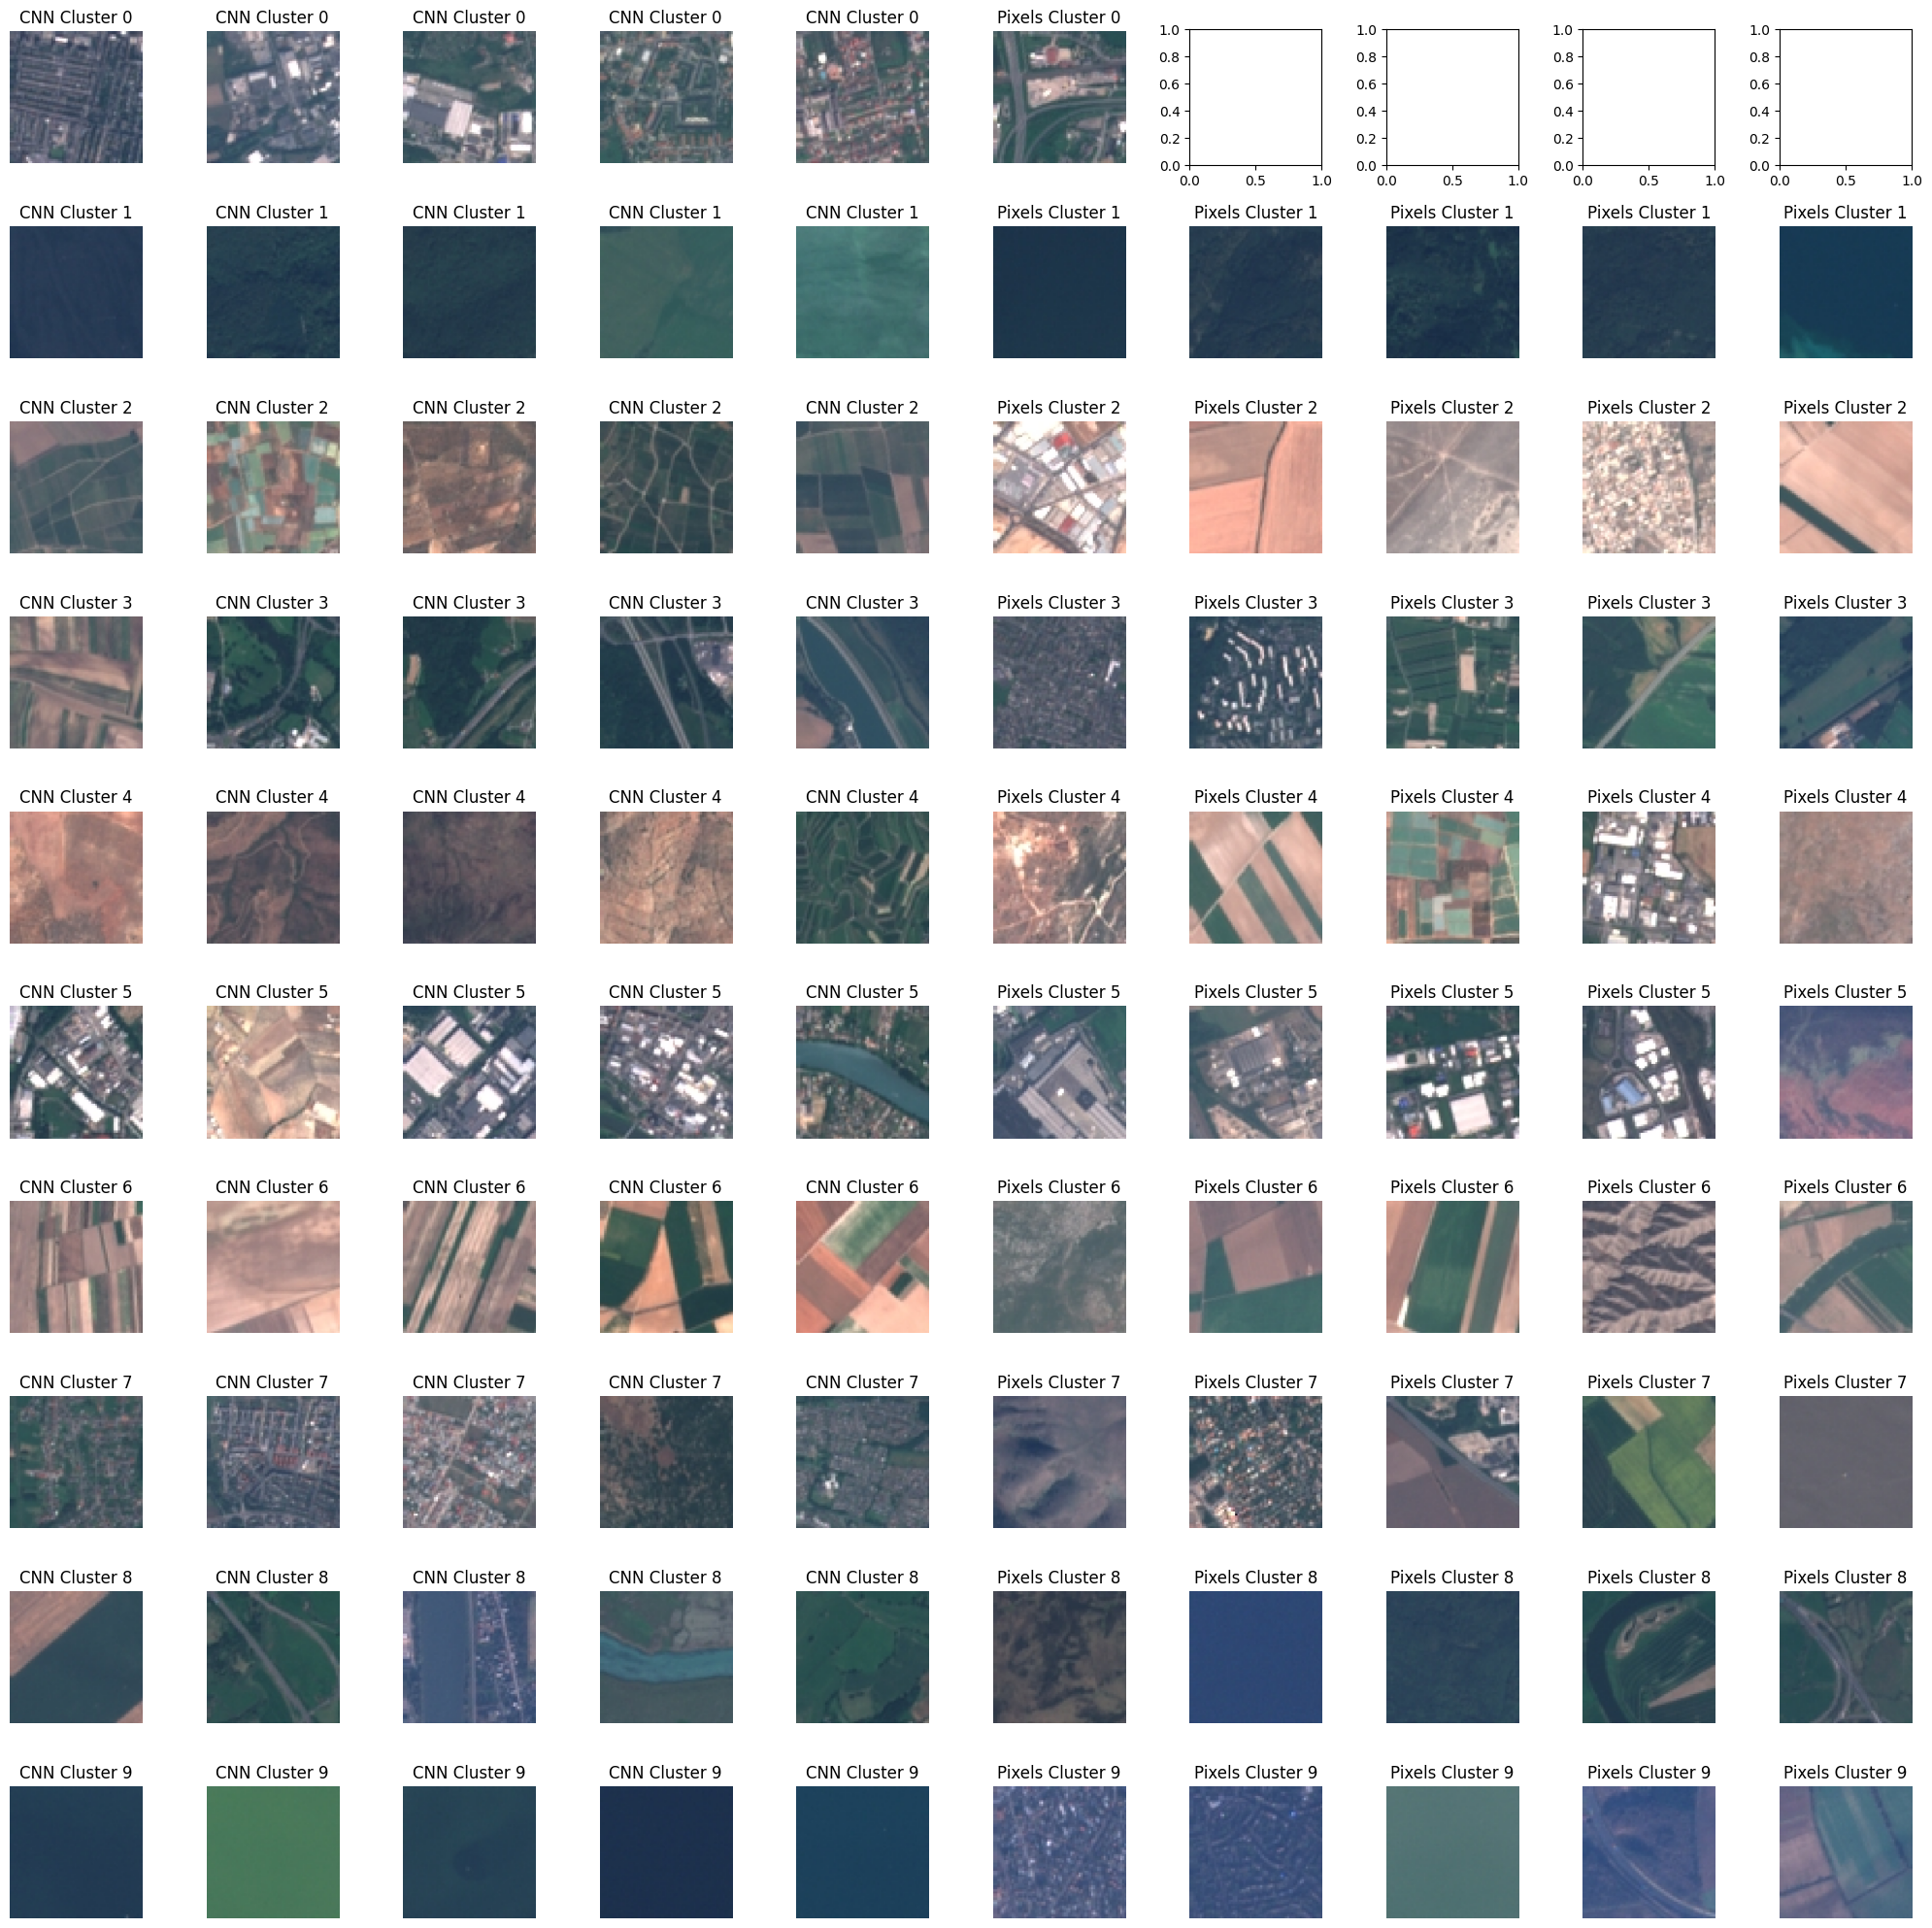

In [ ]:
# Question 2e.

import numpy as np
import matplotlib.pyplot as plt

num_images_per_cluster = 5
num_clusters = 10
dataset_images = dataset

fig, axes = plt.subplots(num_clusters, 2 * num_images_per_cluster, figsize = (20, 20))

for cluster_idx in range(num_clusters):

    cluster_indices_CNN = np.where(kmeans_labels_CNN == cluster_idx)[0]
    cluster_indices_pixels = np.where(kmeans_labels_pixels == cluster_idx)[0]

    # Choose randomly 5 images from each cluster
    sampled_indices_CNN = np.random.choice(
        cluster_indices_CNN, size = min(num_images_per_cluster, len(cluster_indices_CNN)), replace = False
    )
    sampled_indices_pixels = np.random.choice(
        cluster_indices_pixels, size = min(num_images_per_cluster, len(cluster_indices_pixels)), replace = False
    )

    for j, image_idx in enumerate(sampled_indices_CNN):
        selected_image = dataset_images[image_idx]

        # Extract the image part from the tuple
        if isinstance(selected_image, tuple):
            selected_image = selected_image[0]

        # Remove the batch dimension
        selected_image = selected_image.squeeze(axis=0)

        if selected_image.max() > 1:
            selected_image = selected_image / 255.0

        # Plot CNN
        axes[cluster_idx, j].imshow(selected_image)
        axes[cluster_idx, j].axis('off')
        axes[cluster_idx, j].set_title(f"CNN Cluster {cluster_idx}")

    for j, image_idx in enumerate(sampled_indices_pixels):
        selected_image = dataset_images[image_idx]

        if isinstance(selected_image, tuple):
            selected_image = selected_image[0]

        selected_image = selected_image.squeeze(axis=0)

        if selected_image.max() > 1:
            selected_image = selected_image / 255.0

        # Plot Pixels
        axes[cluster_idx, j + num_images_per_cluster].imshow(selected_image)
        axes[cluster_idx, j + num_images_per_cluster].axis('off')
        axes[cluster_idx, j + num_images_per_cluster].set_title(f"Pixels Cluster {cluster_idx}")

plt.tight_layout()
plt.show()